In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
#Training data
data_train=pd.read_excel(r"C:\Users\User\Desktop\Akshay project\Data set\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
#All columns are object type except price
#Machine wont be able to understand date and time mentioned in the columns

In [ ]:
#We will drop the rows with null values

In [5]:
data_train.dropna(inplace=True)

In [6]:
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
#Test data
data_test=pd.read_excel(r"C:\Users\User\Desktop\Akshay project\Data set\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
#No null values. We will add the test data to train data and do some preprocessing together.
Combined_data=data_train.append(data_test,sort=False)

In [11]:
#We will split the data since the machine cannot learn the data format
Combined_data['Date']=Combined_data['Date_of_Journey'].str.split('/').str[0]
Combined_data['Month']=Combined_data['Date_of_Journey'].str.split('/').str[1]
Combined_data['Year']=Combined_data['Date_of_Journey'].str.split('/').str[2]

In [12]:
Combined_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [13]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             13353 non-null  object 
 12  Month            13353 non-null  object 
 13  Year             13353 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [14]:
#We will convert object type into integer
Combined_data['Date']=Combined_data['Date'].astype(int)
Combined_data['Month']=Combined_data['Month'].astype(int)
Combined_data['Year']=Combined_data['Year'].astype(int)

In [15]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
 11  Date             13353 non-null  int32  
 12  Month            13353 non-null  int32  
 13  Year             13353 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [16]:
#We will drop the date of journey since we have already converted it
Combined_data=Combined_data.drop(['Date_of_Journey'],axis=1)

In [17]:
#We will split the arrival time too since machine cannot learn timing dataset
Combined_data['Arrival_Time']=Combined_data['Arrival_Time'].str.split(' ').str[0]

In [18]:
Combined_data['Total_Stops']=Combined_data['Total_Stops'].replace('non-stop','0 stop')

In [19]:
Combined_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [20]:
Combined_data['Stop'] = Combined_data['Total_Stops'].str.split(' ').str[0]

In [21]:
Combined_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [22]:
#Converting object type into integer and dropping unwanted column now
Combined_data['Stop']=Combined_data['Stop'].astype(int)
Combined_data=Combined_data.drop(['Total_Stops'],axis=1)

In [23]:
Combined_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [24]:
#Converting arrival time into each column as hours and minutes
Combined_data['Arrival_Hour'] = Combined_data['Arrival_Time'] .str.split(':').str[0]
Combined_data['Arrival_Minute'] = Combined_data['Arrival_Time'] .str.split(':').str[1]

In [25]:
#Converting object type into integer and dropping unwanted column now
Combined_data['Arrival_Hour']=Combined_data['Arrival_Hour'].astype(int)
Combined_data['Arrival_Minute']=Combined_data['Arrival_Minute'].astype(int)
Combined_data=Combined_data.drop(['Arrival_Time'],axis=1)

In [26]:
Combined_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [27]:
#Converting departure time into each column as hours and minutes
Combined_data['Departure_Hour'] = Combined_data['Dep_Time'] .str.split(':').str[0]
Combined_data['Departure_Minute'] = Combined_data['Dep_Time'] .str.split(':').str[1]

In [28]:
#Converting object type into integer and dropping unwanted column now
Combined_data['Departure_Hour']=Combined_data['Departure_Hour'].astype(int)
Combined_data['Departure_Minute']=Combined_data['Departure_Minute'].astype(int)
Combined_data=Combined_data.drop(['Dep_Time'],axis=1)

In [29]:
Combined_data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [30]:
#Converting route into each individual column
Combined_data['Route_1']=Combined_data['Route'].str.split('→ ').str[0]
Combined_data['Route_2']=Combined_data['Route'].str.split('→ ').str[1]
Combined_data['Route_3']=Combined_data['Route'].str.split('→ ').str[2]
Combined_data['Route_4']=Combined_data['Route'].str.split('→ ').str[3]
Combined_data['Route_5']=Combined_data['Route'].str.split('→ ').str[4]

In [31]:
Combined_data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [32]:
Combined_data['Route_1'].fillna("None",inplace=True)
Combined_data['Route_2'].fillna("None",inplace=True)
Combined_data['Route_3'].fillna("None",inplace=True)
Combined_data['Route_4'].fillna("None",inplace=True)
Combined_data['Route_5'].fillna("None",inplace=True)

In [37]:
duration = list(Combined_data["Duration"])

In [39]:
#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration[i] = '0h '+ duration[i]           # add 0 hour

In [40]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [41]:
Combined_data['Duration_hrs'] = duration_hours
Combined_data['Duration_mins'] = duration_mins

In [42]:
Combined_data=Combined_data.drop(['Route'],axis=1)
Combined_data=Combined_data.drop(['Duration'],axis=1)

In [43]:
Combined_data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None,2,50
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None,7,25
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None,19,0
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None,5,25
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None,4,45


In [44]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Additional_Info   13353 non-null  object 
 4   Price             10682 non-null  float64
 5   Date              13353 non-null  int32  
 6   Month             13353 non-null  int32  
 7   Year              13353 non-null  int32  
 8   Stop              13353 non-null  int32  
 9   Arrival_Hour      13353 non-null  int32  
 10  Arrival_Minute    13353 non-null  int32  
 11  Departure_Hour    13353 non-null  int32  
 12  Departure_Minute  13353 non-null  int32  
 13  Route_1           13353 non-null  object 
 14  Route_2           13353 non-null  object 
 15  Route_3           13353 non-null  object 
 16  Route_4           13353 non-null  object 

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Combined_data["Airline"]=encoder.fit_transform(Combined_data['Airline'])
Combined_data["Source"]=encoder.fit_transform(Combined_data['Source'])
Combined_data["Destination"]=encoder.fit_transform(Combined_data['Destination'])
Combined_data["Additional_Info"]=encoder.fit_transform(Combined_data['Additional_Info'])
Combined_data["Route_1"]=encoder.fit_transform(Combined_data['Route_1'])
Combined_data["Route_2"]=encoder.fit_transform(Combined_data['Route_2'])
Combined_data["Route_3"]=encoder.fit_transform(Combined_data['Route_3'])
Combined_data["Route_4"]=encoder.fit_transform(Combined_data['Route_4'])
Combined_data["Route_5"]=encoder.fit_transform(Combined_data['Route_5'])

In [46]:
Combined_data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5,Duration_hrs,Duration_mins
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4,2,50
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4,7,25
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4,19,0
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4,5,25
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4,4,45


In [47]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  int32  
 1   Source            13353 non-null  int32  
 2   Destination       13353 non-null  int32  
 3   Additional_Info   13353 non-null  int32  
 4   Price             10682 non-null  float64
 5   Date              13353 non-null  int32  
 6   Month             13353 non-null  int32  
 7   Year              13353 non-null  int32  
 8   Stop              13353 non-null  int32  
 9   Arrival_Hour      13353 non-null  int32  
 10  Arrival_Minute    13353 non-null  int32  
 11  Departure_Hour    13353 non-null  int32  
 12  Departure_Minute  13353 non-null  int32  
 13  Route_1           13353 non-null  int32  
 14  Route_2           13353 non-null  int32  
 15  Route_3           13353 non-null  int32  
 16  Route_4           13353 non-null  int32  

In [48]:
#Now we are finished with feature engineering together for the training and testing data.
#We will split the train and test data now.
train_data=Combined_data[0:10682]
test_data=Combined_data[10682:]

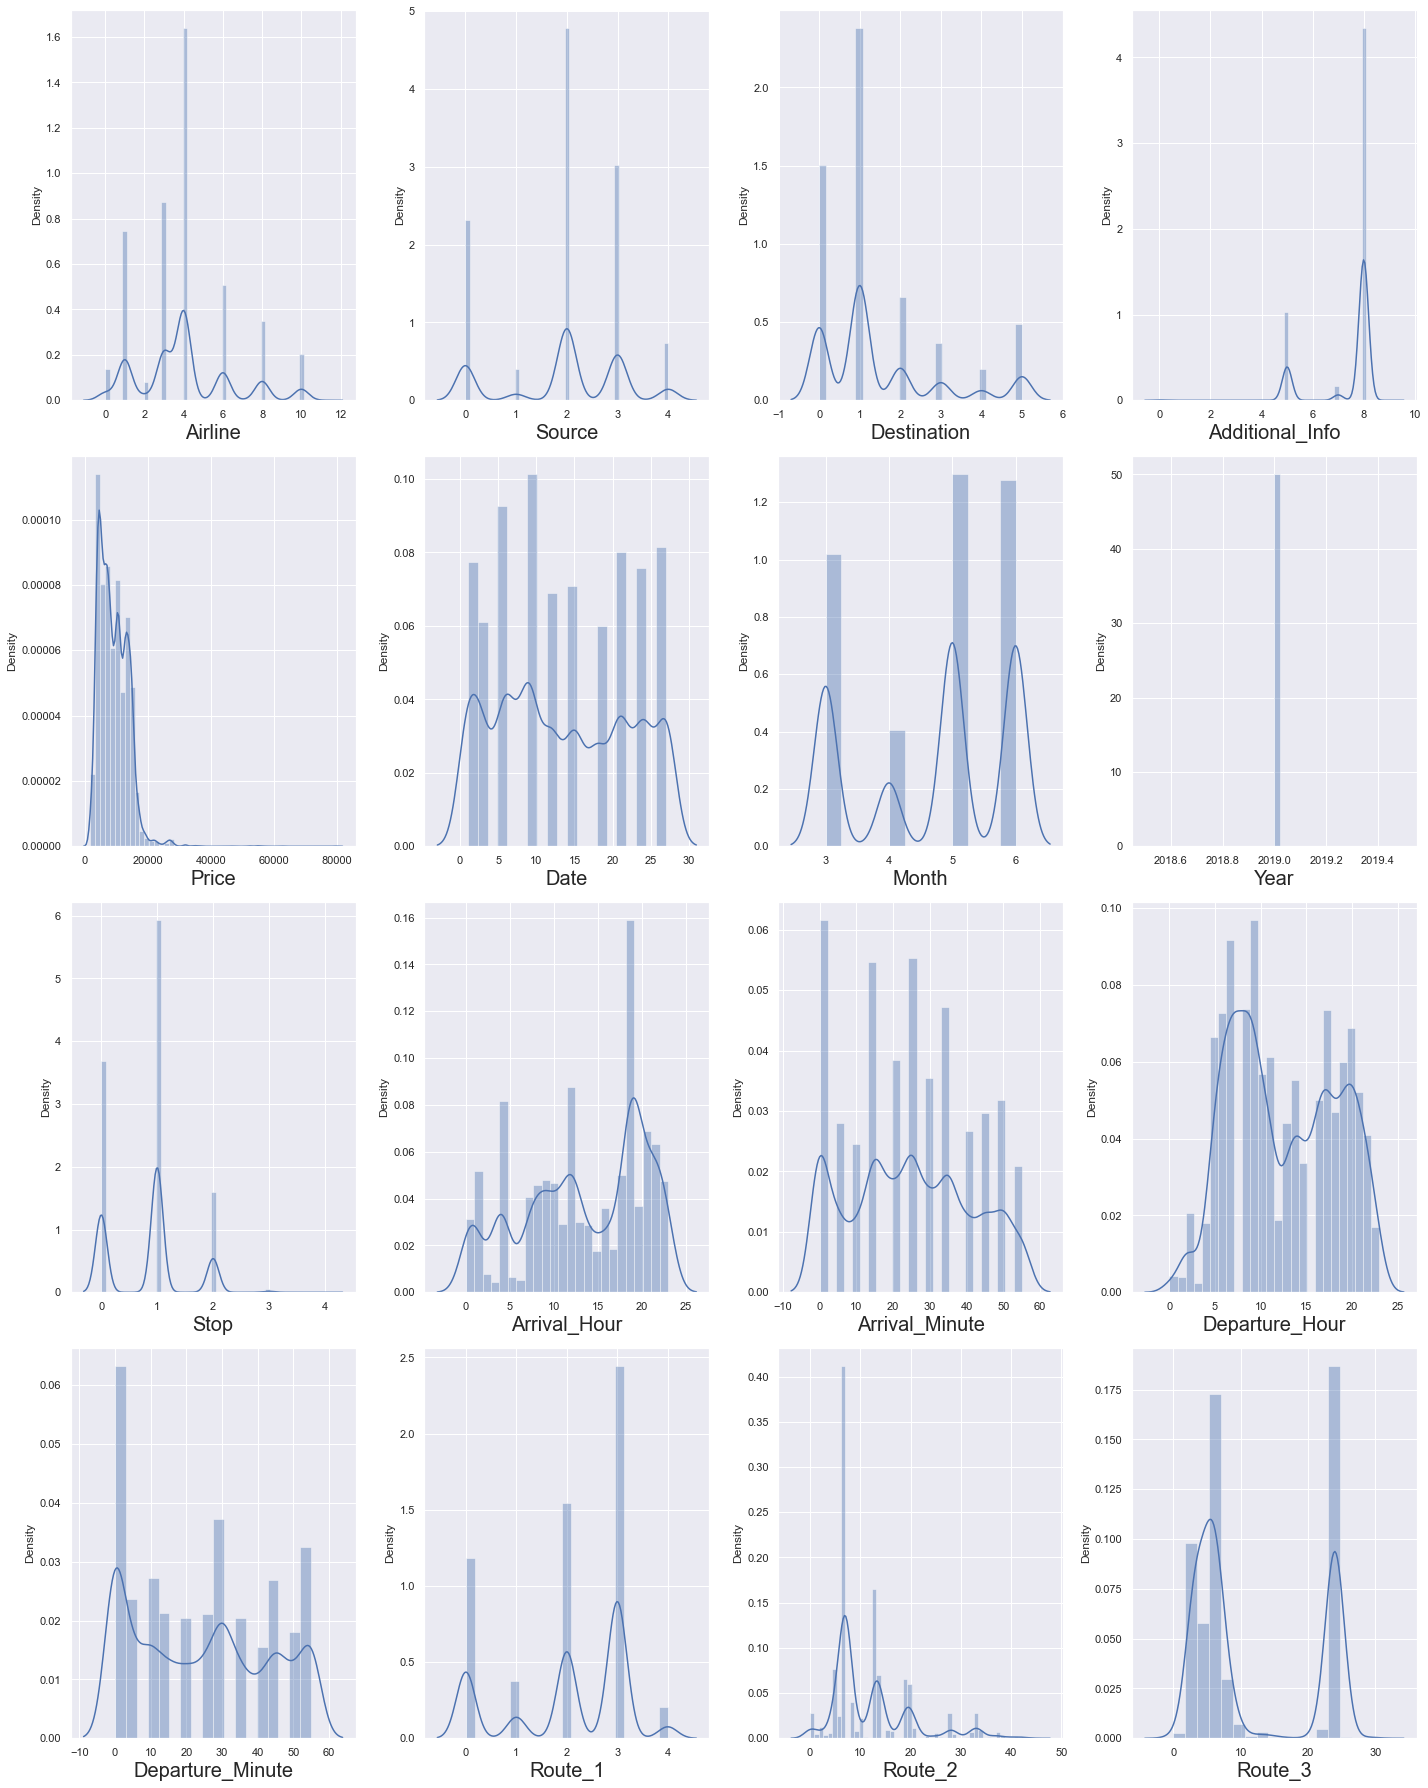

In [50]:
#Lets see how data is distributed for every column
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train_data:
    if plotnumber<=16:
        ax= plt.subplot(4,4,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

In [51]:
#We will start building the model
y = train_data['Price']
X = train_data.drop(columns = ['Price'])

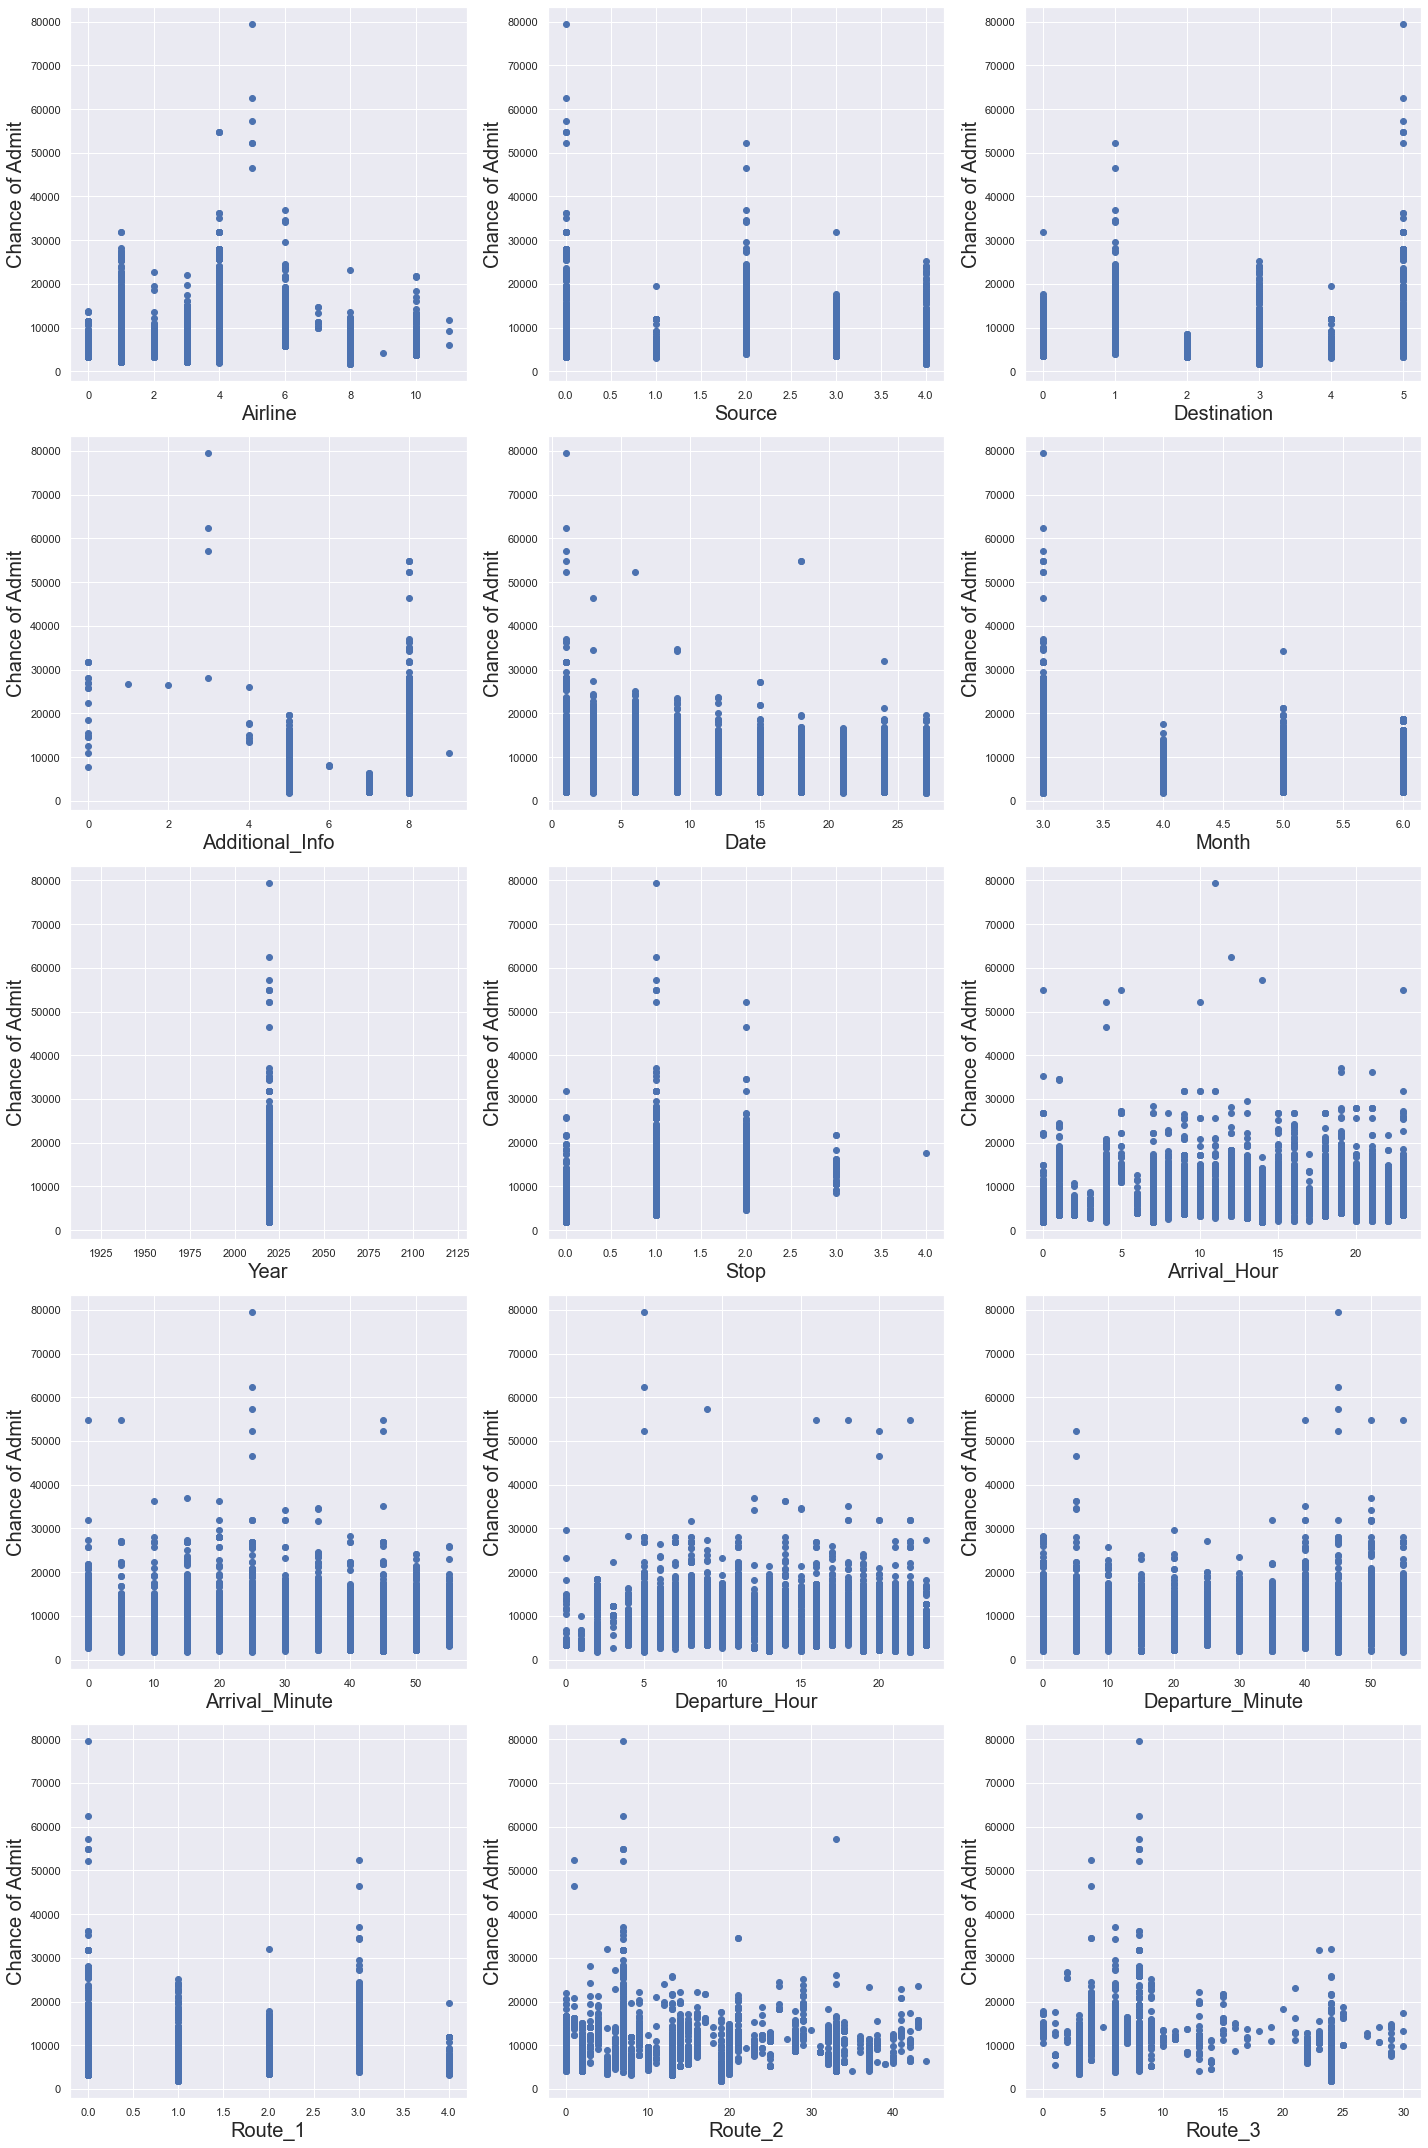

In [52]:
#relationship between feature and label
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15:
        ax =plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#Lets check the values
vif

,vif,Features
0,1.106296,Airline
1,1.700248,Source
2,2.209199,Destination
3,1.093323,Additional_Info
4,1.022776,Date
5,1.248357,Month
6,NaN,Year
7,24.087959,Stop
8,1.056031,Arrival_Hour
9,1.118515,Arrival_Minute


In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.25, random_state=355)

In [60]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [61]:
regression.score(x_train,y_train)

0.49677223013369187

In [62]:
regression.score(x_test,y_test)

0.5024222596453393

In [63]:
y_pred = regression.predict(x_test)

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5024222596453393

In [ ]:
# So we got the test score of 50.24% from the multiple linear regression model

# Regularization

In [66]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

In [67]:
#Lasso regularization
#LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, normalize=True)

In [68]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.18977156250837504

In [69]:
#now that we have best parameter, lets use lasso regression and see how well our data has fitted
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.18977156250837504)

In [70]:
lasso_reg.score(x_test,y_test)

0.5024309683621814

In [ ]:
#Lasso regression model's score has increased slightly than that of linear regression model

In [71]:
#using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations
#we will pass an array of random numbers for RidgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high = 10, size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.61295344, 4.59421728, 7.86312555, 4.82150786, 8.82106639,
       3.95736769, 0.61907372, 3.68527368, 4.06119258, 1.289279  ,
       2.77203391, 1.23090358, 7.61178882, 4.30029976, 2.93460373,
       7.61561362, 9.95587298, 2.59474675, 2.72998652, 6.67733156,
       2.73368532, 9.49118908, 0.83513579, 6.77914602, 1.08861693,
       6.84893876, 8.06642305, 2.13833544, 1.11838886, 5.86782709,
       8.50334775, 6.66239724, 8.87753301, 9.15278534, 0.38903751,
       1.43364884, 4.28429295, 7.08833342, 6.58680973, 9.71609601,
       2.87667235, 3.72215468, 0.74746713, 8.93469216, 7.60790294,
       6.88431085, 2.46245641, 0.26355788, 1.32243299, 6.97628353]),
        cv=10, normalize=True)

In [72]:
ridgecv.alpha_

0.2635578842309205

In [73]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.2635578842309205)

In [74]:
ridge_model.score(x_test,y_test)

0.5024229284207302

In [ ]:
# So using Ridge regression model, the score has decreased.

# Random forest regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train , y_train)

RandomForestRegressor()

In [76]:
y_pred = reg_rf.predict(x_test)

In [77]:
reg_rf.score(x_train , y_train)

0.9788716186404711

In [78]:
reg_rf.score(x_test , y_test)

0.8778052677616075

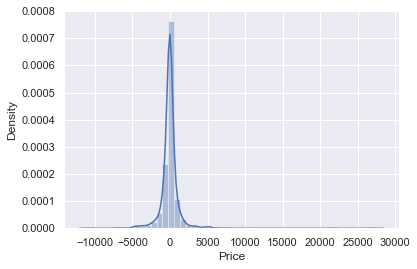

In [79]:
sns.distplot(y_test-y_pred)
plt.show()

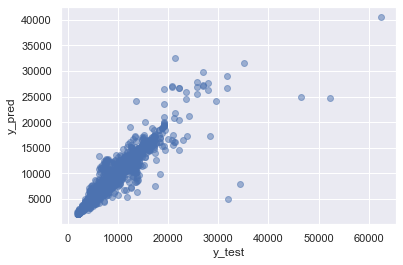

In [80]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [81]:
from sklearn import metrics

In [82]:
print('MAE:' ,metrics.mean_absolute_error(y_test,y_pred))
print('MAE:' ,metrics.mean_squared_error(y_test,y_pred))
print('MAE:' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 648.7463692439887
MAE: 2594406.0387116093
MAE: 1610.716001879788


In [83]:
metrics.r2_score(y_test,y_pred)

0.8778052677616075

# Tuning the data

In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [86]:
#Create the random grid
random_grid = { 'n_estimators':n_estimators,
                'max_features':max_features,
                'max_depth': max_depth,
                'min_samples_split':min_samples_split,
                'min_samples_leaf': min_samples_leaf}

In [87]:
rf_random = RandomizedSearchCV(estimator = reg_rf,param_distributions = random_grid , scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42 , n_jobs=1)

In [88]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [89]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [90]:
prediction = rf_random.predict(x_test)

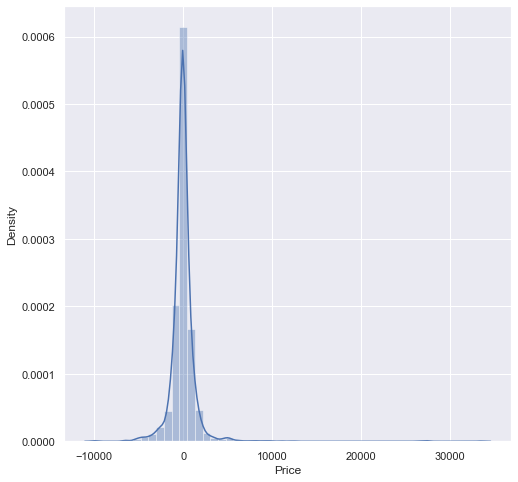

In [91]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [92]:
import pickle
file=open('flight_rf.pkl','wb')

pickle.dump(reg_rf,file)

In [93]:
model=open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [94]:
y_prediction = forest.predict(x_test)

In [95]:
metrics.r2_score(y_test,y_prediction)

0.8778052677616075

In [ ]:
#Here we got 87 %

In [96]:
import pickle
file=open('flight_rf.pkl','wb')

pickle.dump(rf_random,file)

In [97]:
model=open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [98]:
y_prediction = forest.predict(x_test)

In [99]:
metrics.r2_score(y_test,y_prediction)

0.8657665981616518

In [ ]:
# So we have the best model with Random forest regressor and the model is saved also.